In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

In [2]:
data=pd.read_csv('/content/London_51_507218_-0_127586_fc-sample-200524.csv')

In [3]:
data.head()

,forecast dt unixtime,forecast dt iso,slice dt unixtime,slice dt iso,lat,lon,temperature,dew_point,pressure,ground_pressure,...,rain,snow,ice,fr_rain,convective,snow_depth,accumulated,hours,rate,probability
0,1714521600,2024-05-01 00:00:00 +0000 UTC,1714521600,2024-05-01 00:00:00 +0000 UTC,51.507218,-0.127586,10.36,9.58,1008.68,1004.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.00
1,1714521600,2024-05-01 00:00:00 +0000 UTC,1714525200,2024-05-01 01:00:00 +0000 UTC,51.507218,-0.127586,10.55,9.38,1008.55,1004.55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.00
2,1714521600,2024-05-01 00:00:00 +0000 UTC,1714528800,2024-05-01 02:00:00 +0000 UTC,51.507218,-0.127586,10.37,9.32,1008.42,1004.41,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.00
3,1714521600,2024-05-01 00:00:00 +0000 UTC,1714532400,2024-05-01 03:00:00 +0000 UTC,51.507218,-0.127586,10.07,9.36,1008.31,1004.29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.00
4,1714521600,2024-05-01 00:00:00 +0000 UTC,1714536000,2024-05-01 04:00:00 +0000 UTC,51.507218,-0.127586,9.90,9.50,1008.21,1004.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.01


In [4]:
data.describe()

,forecast dt unixtime,slice dt unixtime,lat,lon,temperature,dew_point,pressure,ground_pressure,humidity,clouds,...,rain,snow,ice,fr_rain,convective,snow_depth,accumulated,hours,rate,probability
count,1.540000e+03,1.540000e+03,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,...,1540.000000,1540.0,1540.0,1540.0,1540.000000,1540.0,1540.000000,1540.0,1540.000000,1540.000000
mean,1.714554e+09,1.715245e+09,51.507218,-0.127586,12.389201,8.125623,1013.335247,1009.324182,77.090740,77.385065,...,0.109675,0.0,0.0,0.0,3.944953,0.0,0.109675,1.0,0.000033,0.216623
std,2.415738e+04,4.009607e+05,0.000000,0.000000,3.284090,2.880710,7.980367,7.946188,16.082407,31.741163,...,0.302859,0.0,0.0,0.0,2.571103,0.0,0.302859,0.0,0.000083,0.322847
min,1.714522e+09,1.714522e+09,51.507218,-0.127586,3.160000,-1.240000,996.660000,992.710000,34.660000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,1.0,0.000000,0.000000
25%,1.714538e+09,1.714900e+09,51.507218,-0.127586,10.140000,6.280000,1008.037500,1004.057500,65.330000,62.000000,...,0.000000,0.0,0.0,0.0,1.854000,0.0,0.000000,1.0,0.000000,0.000000
50%,1.714554e+09,1.715245e+09,51.507218,-0.127586,11.940000,8.090000,1011.935000,1007.955000,79.835000,96.000000,...,0.000000,0.0,0.0,0.0,2.688000,0.0,0.000000,1.0,0.000000,0.000000
75%,1.714570e+09,1.715591e+09,51.507218,-0.127586,14.612500,10.415000,1019.322500,1015.265000,91.155000,100.000000,...,0.000000,0.0,0.0,0.0,6.833000,0.0,0.000000,1.0,0.000017,0.370000
max,1.714586e+09,1.715969e+09,51.507218,-0.127586,22.580000,15.250000,1031.650000,1027.610000,99.310000,100.000000,...,2.670000,0.0,0.0,0.0,8.271000,0.0,2.670000,1.0,0.000742,1.000000


In [5]:
data.drop(["forecast dt unixtime","forecast dt iso","slice dt unixtime","slice dt iso","lat","lon","lat","lon","snow","ice","fr_rain","snow_depth","hours"],axis=1)

,temperature,dew_point,pressure,ground_pressure,humidity,clouds,wind_speed,wind_deg,rain,convective,accumulated,rate,probability
0,10.36,9.58,1008.68,1004.68,94.90,100,1.86,113.44,0.0,0.000,0.0,0.000000,0.00
1,10.55,9.38,1008.55,1004.55,93.25,89,1.05,114.04,0.0,0.000,0.0,0.000000,0.00
2,10.37,9.32,1008.42,1004.41,93.97,80,0.70,110.06,0.0,0.000,0.0,0.000000,0.00
3,10.07,9.36,1008.31,1004.29,95.70,72,0.68,103.84,0.0,0.000,0.0,0.000000,0.00
4,9.90,9.50,1008.21,1004.20,97.07,68,0.84,97.73,0.0,0.000,0.0,0.000000,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,11.36,10.35,1011.04,1007.03,93.48,100,3.47,45.23,0.0,2.667,0.0,0.000014,0.14
1536,11.43,10.33,1011.04,1007.03,92.90,100,3.19,45.04,0.0,2.688,0.0,0.000011,0.16
1537,11.50,10.33,1011.07,1007.06,92.46,100,2.92,46.20,0.0,2.688,0.0,0.000011,0.16
1538,11.51,10.32,1011.17,1007.15,92.26,100,2.71,49.02,0.0,2.688,0.0,0.000008,0.11


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   forecast dt unixtime  1540 non-null   int64  
 1   forecast dt iso       1540 non-null   object 
 2   slice dt unixtime     1540 non-null   int64  
 3   slice dt iso          1540 non-null   object 
 4   lat                   1540 non-null   float64
 5   lon                   1540 non-null   float64
 6   temperature           1540 non-null   float64
 7   dew_point             1540 non-null   float64
 8   pressure              1540 non-null   float64
 9   ground_pressure       1540 non-null   float64
 10  humidity              1540 non-null   float64
 11  clouds                1540 non-null   int64  
 12  wind_speed            1540 non-null   float64
 13  wind_deg              1540 non-null   float64
 14  rain                  1540 non-null   float64
 15  snow                 

In [7]:
data.shape

(1540, 24)

In [8]:
data.isnull().sum()

,0
forecast dt unixtime,0
forecast dt iso,0
slice dt unixtime,0
slice dt iso,0
lat,0
lon,0
temperature,0
dew_point,0
pressure,0
ground_pressure,0


In [9]:
data = data.drop(["forecast dt unixtime", "forecast dt iso", "slice dt unixtime", "slice dt iso", "lat", "lon", "snow", "ice", "fr_rain", "snow_depth", "hours"], axis=1)
data.skew()

,0
temperature,0.273566
dew_point,-0.399497
pressure,0.255040
ground_pressure,0.256261
humidity,-0.522914
clouds,-1.271228
wind_speed,0.194387
wind_deg,0.592176
rain,4.281094
convective,0.319396


In [10]:
selected_data = data[["humidity"]]
print(selected_data)

      humidity
0        94.90
1        93.25
2        93.97
3        95.70
4        97.07
...        ...
1535     93.48
1536     92.90
1537     92.46
1538     92.26
1539     92.40

[1540 rows x 1 columns]


In [11]:
def check_weather(row):
  if 7 <= row["temperature"] <= 18 and 70 <= row["humidity"] <= 90 and 80 <= row["clouds"] <= 100: # Changed equality checks to range checks
    return 0
  elif 5 <= row["temperature"] <= 15 and 80 <= row["humidity"] <= 100 and row["clouds"] == 100 and row["rain"]>0.2: # Changed equality checks to range checks
    return 1
  elif 0 <= row["temperature"] <= 15 and 90 <= row["humidity"] <= 100 and row["clouds"] == 100: # Changed equality checks to range checks
    return 2
  else:
    return 3

data['weather'] = data.apply(check_weather, axis=1)

print(data[['humidity', 'temperature', 'clouds', 'weather']]) # Changed to select multiple columns correctly



      humidity  temperature  clouds  weather
0        94.90        10.36     100        2
1        93.25        10.55      89        3
2        93.97        10.37      80        3
3        95.70        10.07      72        3
4        97.07         9.90      68        3
...        ...          ...     ...      ...
1535     93.48        11.36     100        2
1536     92.90        11.43     100        2
1537     92.46        11.50     100        2
1538     92.26        11.51     100        2
1539     92.40        11.41     100        2

[1540 rows x 4 columns]


In [12]:
data.weather.unique()

array([2, 3, 0, 1])

# 訓練模型(機器學習)



In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

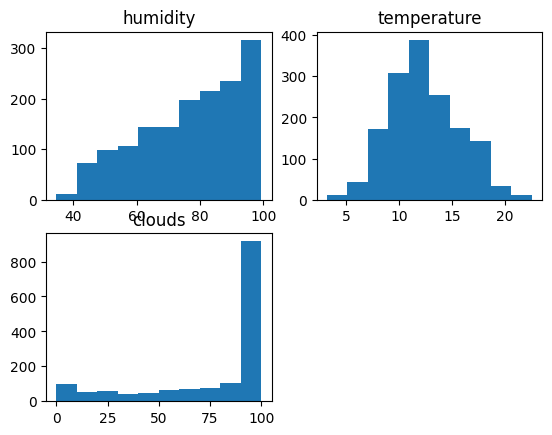

In [14]:
num=['humidity', 'temperature', 'clouds']
for i,col in enumerate(num):
  plt.subplot(2, 2, i+1)
  plt.hist(data[col])
  plt.title(col)
plt.show()

In [15]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [16]:
data.columns

Index(['temperature', 'dew_point', 'pressure', 'ground_pressure', 'humidity',
       'clouds', 'wind_speed', 'wind_deg', 'rain', 'convective', 'accumulated',
       'rate', 'probability', 'weather'],
      dtype='object')

In [17]:
# 我們希望有一個模型，根據感測器接收到的當天環境資訊()預測會不會下雨
# 分割資料，
# x=data[['humidity', 'temperature', 'clouds']]
x=data[['humidity', 'temperature', 'clouds']]
y=data[['weather']]

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=10)

In [18]:
from xgboost import XGBClassifier

model1=XGBClassifier()
model1.fit(x_train, y_train)
predict=model1.predict(x_test)

In [19]:
print(accuracy_score(y_test,predict)*100)

95.77922077922078


In [20]:
x_test[10:13]

,humidity,temperature,clouds
684,98.48,11.73,100
486,51.67,16.47,64
1297,70.75,16.62,100


In [21]:
y_test[10:13]

,weather
684,1
486,3
1297,0


In [22]:
ans=model1.predict(x_test[10:13])
ans

array([1, 3, 0])

# **訓練模型(深度學習)**

In [23]:
x=data[['humidity', 'temperature', 'clouds']]
y=data[['weather']]

x_train = x[0:1233]
y_train = y[0:1233]
x_test = x[1233:]
y_test = y[1233:]

In [24]:
import numpy as np
import pandas as pd

def create_dataset(ds, ds2, look_back=4):  # 每6小時的資料對應4個小時
    X_data, Y_data = [], []

    # 確保 ds 和 ds2 是 DataFrame，並獲取特徵數量
    if isinstance(ds, pd.DataFrame):
        temp1 = ds.values  # 轉換為 numpy.ndarray
    else:
        temp1 = ds

    if isinstance(ds2, pd.DataFrame):
        temp2 = ds2.values  # 轉換為 numpy.ndarray
    else:
        temp2 = ds2

    num_features = temp1.shape[1]  # 獲取特徵數量

    # 每筆訓練資料有 look_back 天的參考資料，標籤為當天的天氣
    for i in range(len(temp1) - look_back):
        temp_data = []
        for j in range(num_features):
            temp_data.append(temp1[i:(i + look_back), j])  # 動態添加所有特徵
        X_data.append(temp_data)

        # 確保標籤的選取不會超出範圍
        if i + look_back < len(temp2):
            Y_data.append(temp2[i + look_back])  # 當天的天氣

    return np.array(X_data), np.array(Y_data)


In [25]:
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_test shape: (307, 3)
y_test shape: (307, 1)


In [26]:
# 這邊設定回看6小時
look_back = 6
X_train, Y_train = create_dataset(x_train, y_train, look_back)
print("回看天數:", look_back)
print("X_train Shape: ", X_train.shape)
print("Y_train Shape: ", Y_train.shape)

回看天數: 6
X_train Shape:  (1227, 3, 6)
Y_train Shape:  (1227, 1)


In [27]:
x_test, y_test = create_dataset(x_test, y_test,look_back)
print("回看小時:", look_back)
print("x_test Shape: ", x_test.shape)
print("y_test Shape: ", y_test.shape)

回看小時: 6
x_test Shape:  (301, 3, 6)
y_test Shape:  (301, 1)


In [28]:
print(x_train.shape)
print(y_train.shape)

(1233, 3)
(1233, 1)


In [29]:
from tensorflow.keras.utils import to_categorical

print(Y_train[5:6])
Y_train = to_categorical(Y_train)
Y_test = to_categorical(y_test)
print(Y_train[5:6])

[[3]]
[[0. 0. 0. 1.]]


In [30]:
!pip install scikit-learn


In [31]:
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# 假設 x 和 y 是你的數據和標籤
x = np.random.rand(1000, 3, 6)  # 1000 個樣本，每個樣本有 3 個時間步，每個時間步 6 個特徵
y = np.random.randint(0, 4, size=(1000,))  # 假設有 4 個類別
y = np.eye(4)[y]  # 將標籤轉換為一熱編碼

# 將數據分割為訓練集和驗證集
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# 定義類別數量
num_classes = y_train.shape[1]  # 假設 Y_train 是一熱編碼，這裡應該是 4

# 建立模型
model = Sequential()
model.add(SimpleRNN(50, input_shape=(3, 6), return_sequences=False))
model.add(Dense(num_classes, activation='softmax'))  # 根據你的類別數量設置 num_classes

# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# 設定 EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# 訓練模型
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=100,
    callbacks=[early_stopping]
)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 129ms/step - accuracy: 0.2345 - loss: 1.4324 - val_accuracy: 0.2000 - val_loss: 1.4243
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.2507 - loss: 1.4098 - val_accuracy: 0.1900 - val_loss: 1.4227
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2587 - loss: 1.3909 - val_accuracy: 0.2100 - val_loss: 1.4140
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2688 - loss: 1.3923 - val_accuracy: 0.2400 - val_loss: 1.4146
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2883 - loss: 1.3940 - val_accuracy: 0.2350 - val_loss: 1.4061
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2727 - loss: 1.3891 - val_accuracy: 0.2350 - val_loss: 1.4106
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3062 - loss: 1.3772 - val_accuracy: 0.2300 - val_loss: 1.4071
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3130 - loss: 1.3726 - val_accuracy: 0.2100

In [32]:
model.fit(X_train, Y_train, epochs=100, batch_size=16, verbose=2)

Epoch 1/100
77/77 - 3s - 36ms/step - accuracy: 0.5795 - loss: 0.9648
Epoch 2/100
77/77 - 0s - 2ms/step - accuracy: 0.5958 - loss: 0.8685
Epoch 3/100
77/77 - 0s - 4ms/step - accuracy: 0.6308 - loss: 0.8307
Epoch 4/100
77/77 - 0s - 3ms/step - accuracy: 0.6463 - loss: 0.8215
Epoch 5/100
77/77 - 0s - 5ms/step - accuracy: 0.6504 - loss: 0.8039
Epoch 6/100
77/77 - 1s - 7ms/step - accuracy: 0.6438 - loss: 0.7923
Epoch 7/100
77/77 - 0s - 5ms/step - accuracy: 0.6553 - loss: 0.7713
Epoch 8/100
77/77 - 1s - 7ms/step - accuracy: 0.6569 - loss: 0.7657
Epoch 9/100
77/77 - 0s - 3ms/step - accuracy: 0.6479 - loss: 0.7669
Epoch 10/100
77/77 - 0s - 5ms/step - accuracy: 0.6430 - loss: 0.7572
Epoch 11/100
77/77 - 1s - 11ms/step - accuracy: 0.6659 - loss: 0.7486
Epoch 12/100
77/77 - 0s - 6ms/step - accuracy: 0.6691 - loss: 0.7372
Epoch 13/100
77/77 - 1s - 8ms/step - accuracy: 0.6699 - loss: 0.7416
Epoch 14/100
77/77 - 0s - 5ms/step - accuracy: 0.6659 - loss: 0.7495
Epoch 15/100
77/77 - 1s - 8ms/step - accu

In [37]:
predict = model.predict(x_test[5:6])
classes = np.argmax(predict, axis=1)
weather_classes = {0: "陰天", 1: "雨天", 2: "起霧", 3: "晴天"}
predicted_weather = weather_classes[classes[0]]

# The problem is here: y_test[5] is a NumPy array, not an integer
# Extract the integer value from the array using item()
actual_weather = weather_classes[y_test[5].item()]

print(f"預測的天氣: {predicted_weather}, 實際的天氣: {actual_weather}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
預測的天氣: 晴天, 實際的天氣: 晴天
